# FEMA Disaster Cost Forecasting
#### Capstone 2 - Exploratory Data Analysis
Michael Garber


#### EDA High-Level Steps
1. Build data profiles and tables
    2. Inferential statistics
3. Explore data relationships
    4. Data visualization
5. Feature Selection and Engineering

Goal: Explore the data relationships of all your features and understand how the features compare to the response variable.

#### FEMA Disaster Cost Forecasting Goals
- predict/forecast/risk assess FEMA 2025 costs
- *dependent variable will be the sum of costs that each disaster records. To be defined in step three feature selection

#### Build data profiles and tables
- summary statistics
- categorical variable counts & review
- visualize/graph columns

In [6]:
#import libraries
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

In [7]:
#Load cleaned data
femaDataClean = pd.read_csv('../data/interim/femaMasterData_clean.csv')

#don't display as scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [8]:
#display summary statistics table but kill the scientific notation format)
#femaDataClean.describe().apply(lambda s: s.apply('{0:.2f}'.format))
femaDataClean.describe()


,Unnamed: 0,disasterNumber,region,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,totalNumberIaApproved,totalAmountIhpApproved,totalAmountHaApproved,totalAmountOnaApproved,totalObligatedAmountPa,totalObligatedAmountCatAb,totalObligatedAmountCatC2g,totalObligatedAmountHmgp
count,4929.00,4929.00,4929.00,4678.00,4678.00,4678.00,4678.00,4929.00,4929.00,4929.00,4929.00,4929.00,4929.00,4929.00,4929.00
mean,2464.00,2595.37,6.04,0.12,0.30,0.96,0.67,2077.24,6900272.55,4375113.21,2525159.34,48898947.60,26953117.96,19037291.63,2960317.62
std,1423.02,1597.16,2.67,0.33,0.46,0.20,0.47,25729.23,93664078.74,65937064.63,30838228.63,700675492.37,366106042.80,456531715.36,35686759.42
min,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-223778.80,0.00
25%,1232.00,1234.00,4.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2464.00,2469.00,6.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,101953.04,2845.55,0.00,0.00
75%,3696.00,4097.00,9.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,4853317.12,880498.85,658196.23,224743.00
max,4928.00,5523.00,10.00,1.00,1.00,1.00,1.00,774691.00,5247169458.98,3745182194.99,1501987263.99,33992346204.64,14531826835.32,26275729062.66,1675655850.57


In [9]:
femaDataClean.columns

Index(['Unnamed: 0', 'disasterNumber', 'declarationDate', 'disasterName',
       'incidentBeginDate', 'incidentEndDate', 'declarationType', 'stateCode',
       'stateName', 'incidentType', 'entryDate', 'updateDate', 'closeoutDate',
       'region', 'ihProgramDeclared', 'iaProgramDeclared', 'paProgramDeclared',
       'hmProgramDeclared', 'id_x', 'hash_x', 'lastRefresh_x',
       'totalNumberIaApproved', 'totalAmountIhpApproved',
       'totalAmountHaApproved', 'totalAmountOnaApproved',
       'totalObligatedAmountPa', 'totalObligatedAmountCatAb',
       'totalObligatedAmountCatC2g', 'paLoadDate', 'iaLoadDate',
       'totalObligatedAmountHmgp', 'hash_y', 'lastRefresh_y', 'id_y'],
      dtype='object')

In [10]:
#categorical variable anaylsis
#disaster name
print(femaDataClean.disasterName.value_counts())

print("\n*Too many unique values, so this field is probably best not considered a categorical variable")

disasterName
SEVERE STORMS AND FLOODING    299
SEVERE STORMS & FLOODING      273
FLOODING                      109
SEVERE WINTER STORM            96
COVID-19                       83
                             ... 
MATT LOOP FIRE                  1
MOOSE MOUNTAIN FIRE             1
CEED FIRE                       1
REIMER FIRE                     1
TORNADO & HEAVY RAINFALL        1
Name: count, Length: 2357, dtype: int64

*Too many unique values, so this field is probably best not considered a categorical variable


declarationType
Major Disaster      2803
Fire Management     1059
Emergency            604
Fire Suppression     463
Name: count, dtype: int64


[Text(0.5, 1.0, 'Count of Declaration type')]

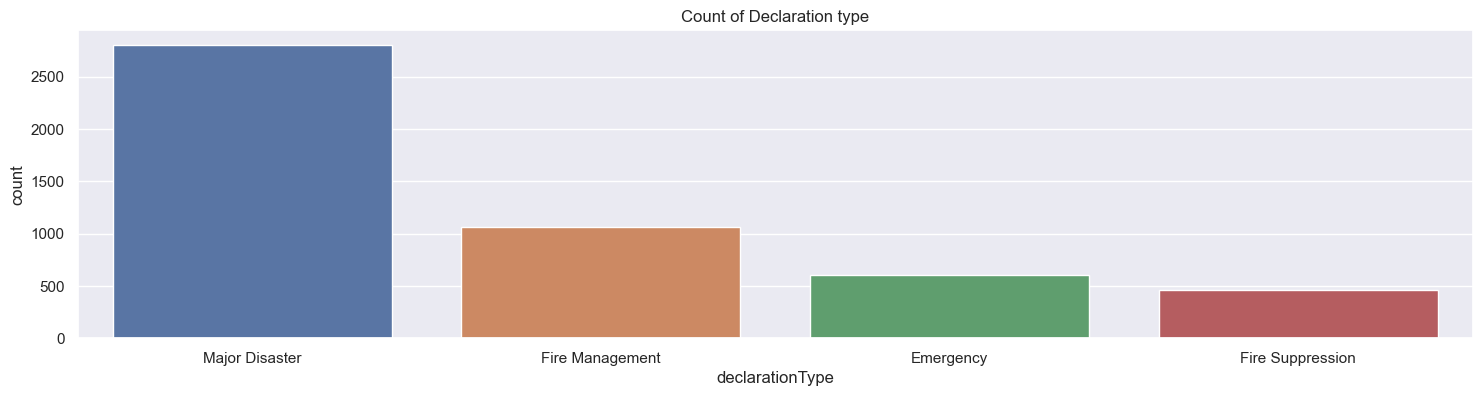

In [11]:
#categorical variable anaylsis
#declarationType
print(femaDataClean.declarationType.value_counts())

#count plot the states and their # of disasters 
## define figure size
sns.set(rc={"figure.figsize":(18, 4)}) #width, height
sns.countplot(data = femaDataClean, x = 'declarationType', order=femaDataClean['declarationType'].value_counts().index).set(title='Count of Declaration type')

incidentType
Fire                 1619
Severe Storm         1083
Flood                 892
Hurricane             443
Tornado               182
Snowstorm             171
Biological            167
Severe Ice Storm       74
Typhoon                63
Drought                46
Earthquake             36
Other                  34
Coastal Storm          31
Freezing               18
Winter Storm           13
Mud/Landslide          12
Tropical Storm          9
Toxic Substances        8
Fishing Losses          6
Volcanic Eruption       6
Dam/Levee Break         6
Human Cause             4
Tsunami                 3
Terrorist               2
Chemical                1
Name: count, dtype: int64


[Text(0.5, 1.0, 'Count of Incident type')]

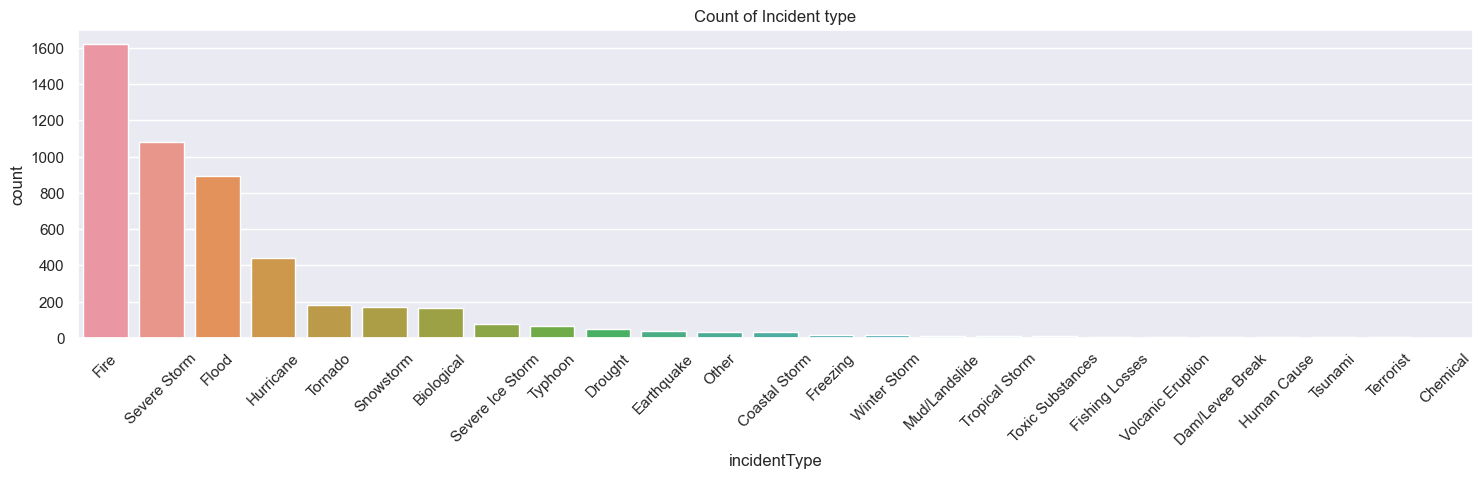

In [12]:
#categorical variable anaylsis
#incident type
print(femaDataClean.incidentType.value_counts())

#count plot the states and their # of disasters 
## define figure size
fig, ax = plt.subplots(figsize=(18, 4))
ax.tick_params(axis='x', labelrotation=45) #nice diagonal x-axis labels
sns.countplot(data = femaDataClean, x = 'incidentType', ax=ax, order=femaDataClean['incidentType'].value_counts().index).set(title='Count of Incident type')

region
6     912
9     766
4     743
10    500
8     460
5     356
7     321
1     320
3     301
2     250
Name: count, dtype: int64


[Text(0.5, 1.0, 'Disasters by FEMA Region #')]

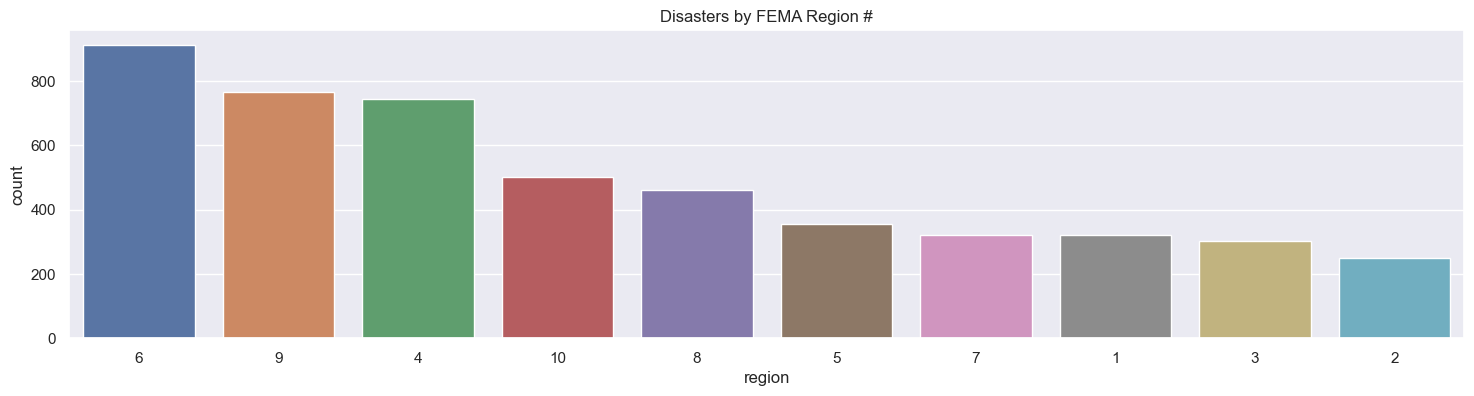

In [13]:
#categorical variable anaylsis
#region (geographic subdivided regious of the US and it's territories)
print(femaDataClean.region.value_counts())

#count plot the regions and their # of disasters 
## define figure size
sns.set(rc={"figure.figsize":(18, 4)}) #width, height
sns.countplot(data = femaDataClean, x = 'region', order=femaDataClean['region'].value_counts().index).set(title='Disasters by FEMA Region #')

stateName
California                        380
Texas                             376
Oklahoma                          230
Washington                        207
Florida                           178
Oregon                            153
New Mexico                        117
Arizona                           115
New York                          112
Louisiana                         106
Nevada                            104
Montana                           103
Colorado                          102
Alabama                           101
Mississippi                        94
Tennessee                          91
South Dakota                       91
Kentucky                           90
Kansas                             86
Alaska                             83
Arkansas                           83
West Virginia                      80
Nebraska                           79
Missouri                           79
Minnesota                          79
Iowa                               77
No

[Text(0.5, 1.0, 'Disaster Count by State')]

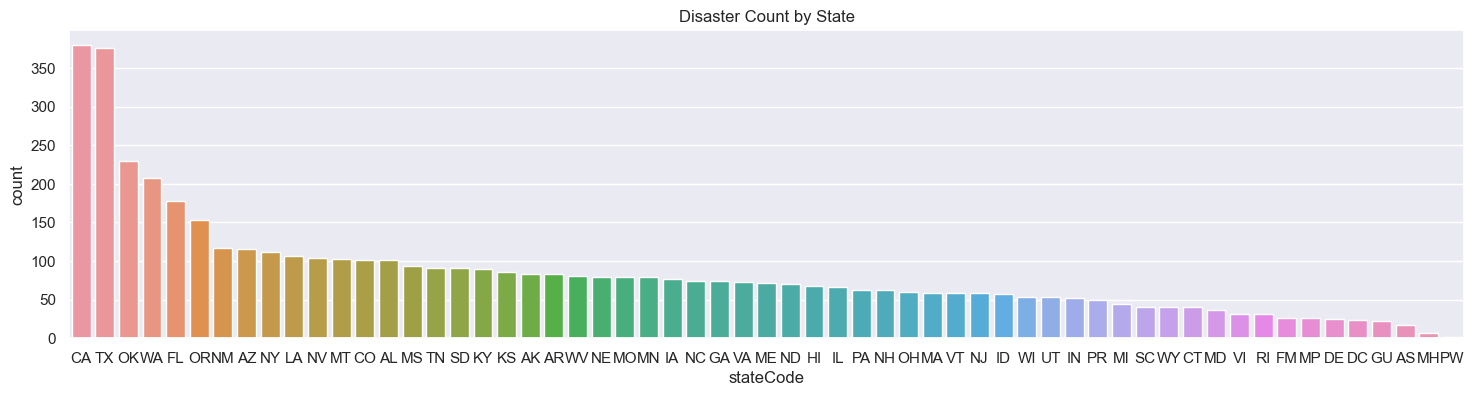

In [14]:
#categorical variable anaylsis
#state name
print(femaDataClean.stateName.value_counts())

#count plot the states and their # of disasters 
## define figure size
sns.set(rc={"figure.figsize":(18, 4)}) #width, height
sns.countplot(data = femaDataClean, x = 'stateCode', order=femaDataClean['stateCode'].value_counts().index).set(title='Disaster Count by State')

In [15]:
#col='totalObligatedAmountHmgp'
#plt.scatter(x=range(len(femaDataClean[col])), y=femaDataClean[col])


#### Explore Data Relationships
##### Data Visualizations
- correlation matrix
- heatmap
- https://datagy.io/python-correlation-matrix/

In [17]:
#correlation matrix for fema cost amount data
selectedFields = ['totalAmountIhpApproved', 'totalAmountHaApproved', 'totalAmountOnaApproved','totalObligatedAmountHmgp']
femaCostMatrix = femaDataClean[selectedFields].corr(method='pearson')
#femaDataClean.head()

Axes(0.125,0.11;0.62x0.77)


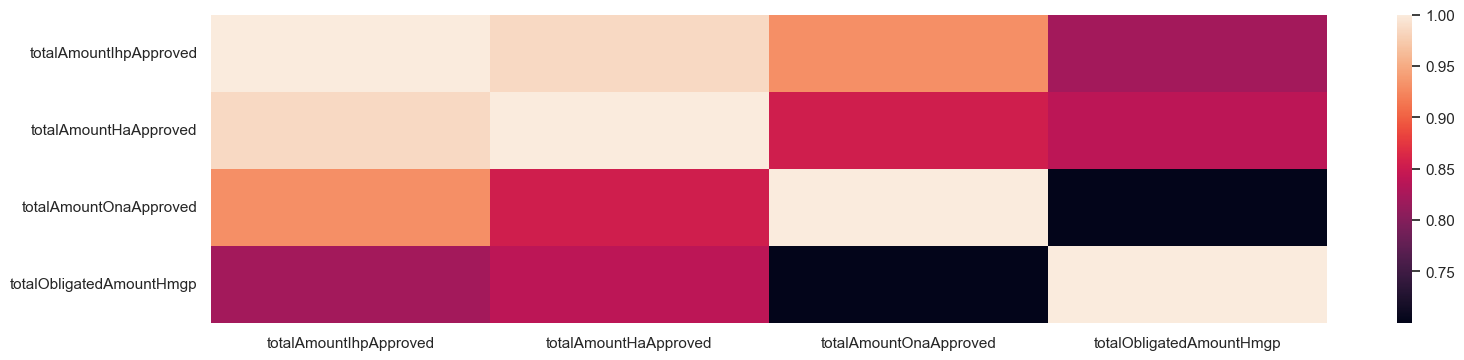

In [18]:
femaCostHeatMap = sns.heatmap(femaCostMatrix)
print(femaCostHeatMap)

In [19]:
# observation of heatmap
print('From the correlation and heatmap we can see all cost/value amounts have a relatively high correlation with each other.')
print('Fields "totalAmountIhpApproved" and "totalAmountHaApproved" have the strongest correlation or all.')

From the correlation and heatmap we can see all cost/value amounts have a relatively high correlation with each other.
Fields "totalAmountIhpApproved" and "totalAmountHaApproved" have the strongest correlation or all.


In [20]:
# calc and store the total cost of totalAmountIhpApproved', 'totalAmountHaApproved', 'totalAmountOnaApproved', 'totalObligatedAmountPa', 'totalObligatedAmountCatAb', 'totalObligatedAmountCatC2g', 'totalObligatedAmountHmgp'
femaDataCleanV2 = femaDataClean.copy()
femaDataCleanV2['totalDisasterCost'] =(femaDataCleanV2['totalAmountIhpApproved'] + femaDataCleanV2['totalAmountHaApproved'] + femaDataCleanV2['totalAmountOnaApproved'] +
    femaDataCleanV2['totalObligatedAmountPa'] + femaDataCleanV2['totalObligatedAmountCatAb'] + femaDataCleanV2['totalObligatedAmountCatC2g'] + femaDataCleanV2['totalObligatedAmountHmgp'])

femaDataCleanV2

,Unnamed: 0,disasterNumber,declarationDate,disasterName,incidentBeginDate,incidentEndDate,declarationType,stateCode,stateName,incidentType,...,totalObligatedAmountPa,totalObligatedAmountCatAb,totalObligatedAmountCatC2g,paLoadDate,iaLoadDate,totalObligatedAmountHmgp,hash_y,lastRefresh_y,id_y,totalDisasterCost
0,0,4734,2023-08-31T00:00:00.000Z,HURRICANE IDALIA,2023-08-27T00:00:00.000Z,2023-09-04T00:00:00.000Z,Major Disaster,FL,Florida,Hurricane,...,314694009.78,292079797.38,2649609.46,2024-07-31T00:00:00.000Z,2024-07-31T00:00:00.000Z,3210378.19,a1059207cb8358eec538027aed9127bf688bbde2,2024-07-31T05:42:47.329Z,ff764a7f-95d0-4dc1-831e-4ab2b69dc8cb,781082489.73
1,1,4738,2023-09-07T00:00:00.000Z,HURRICANE IDALIA,2023-08-30T00:00:00.000Z,2023-08-30T00:00:00.000Z,Major Disaster,GA,Georgia,Hurricane,...,41575923.76,21163460.64,18563405.31,2024-07-31T00:00:00.000Z,2024-07-31T00:00:00.000Z,398441.85,f74097c007ca5f54fdedb4240608324e0969f788,2024-07-31T05:42:47.329Z,9e4ddbff-7ef5-4c97-a8c5-9608d6e7fcae,91587747.52
2,2,4744,2023-10-06T00:00:00.000Z,SEVERE STORMS AND FLOODING,2023-08-03T00:00:00.000Z,2023-08-05T00:00:00.000Z,Major Disaster,VT,Vermont,Flood,...,629453.03,101060.20,439501.00,2024-07-31T00:00:00.000Z,NaN,0.00,6e7e6995991b30a174bf73f4619989384557e3cb,2024-07-31T04:23:08.150Z,48e81a6d-bed6-47ce-97b7-1598b49c7cb8,1170014.23
3,3,4745,2023-10-11T00:00:00.000Z,FLOODING,2023-06-01T00:00:00.000Z,2023-06-08T00:00:00.000Z,Major Disaster,MT,Montana,Flood,...,2457556.99,139534.41,2052851.07,2024-07-31T00:00:00.000Z,NaN,0.00,df8f9bf43f7b25aabe51a16265d6edf1248c1c65,2024-07-31T04:23:08.150Z,f11a8505-234a-4b98-bfca-11efd8b7d27e,4649942.47
4,4,3404,2018-09-12T00:00:00.000Z,TROPICAL STORM OLIVIA,2018-09-09T00:00:00.000Z,2018-09-13T00:00:00.000Z,Emergency,HI,Hawaii,Hurricane,...,0.00,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4924,4924,5,1953-06-06T00:00:00.000Z,FLOODS,1953-06-06T00:00:00.000Z,1953-06-06T00:00:00.000Z,Major Disaster,MT,Montana,Flood,...,0.00,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00
4925,4925,4,1953-06-02T00:00:00.000Z,TORNADO,1953-06-02T00:00:00.000Z,1953-06-02T00:00:00.000Z,Major Disaster,MI,Michigan,Tornado,...,0.00,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00
4926,4926,3,1953-05-29T00:00:00.000Z,FLOOD,1953-05-29T00:00:00.000Z,1953-05-29T00:00:00.000Z,Major Disaster,LA,Louisiana,Flood,...,0.00,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00
4927,4927,2,1953-05-15T00:00:00.000Z,TORNADO & HEAVY RAINFALL,1953-05-15T00:00:00.000Z,1953-05-15T00:00:00.000Z,Major Disaster,TX,Texas,Tornado,...,0.00,0.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00


In [21]:
#check totalDisasterCost calculations, where the was non-zero values
femaDataCleanV2[['totalDisasterCost', 'totalAmountIhpApproved', 'totalAmountHaApproved', 'totalAmountOnaApproved','totalObligatedAmountPa', 'totalObligatedAmountCatAb', 'totalObligatedAmountCatC2g', 'totalObligatedAmountHmgp']][femaDataCleanV2['totalDisasterCost'] != 0]

,totalDisasterCost,totalAmountIhpApproved,totalAmountHaApproved,totalAmountOnaApproved,totalObligatedAmountPa,totalObligatedAmountCatAb,totalObligatedAmountCatC2g,totalObligatedAmountHmgp
0,781082489.73,84224347.46,57623060.18,26601287.28,314694009.78,292079797.38,2649609.46,3210378.19
1,91587747.52,4943257.98,4355586.70,587671.28,41575923.76,21163460.64,18563405.31,398441.85
2,1170014.23,0.00,0.00,0.00,629453.03,101060.20,439501.00,0.00
3,4649942.47,0.00,0.00,0.00,2457556.99,139534.41,2052851.07,0.00
5,4059986.29,0.00,0.00,0.00,1914682.79,156257.50,1714406.99,274639.01
...,...,...,...,...,...,...,...,...
3902,1834236.28,0.00,0.00,0.00,917118.14,1140896.94,-223778.80,0.00
3905,3453779.00,0.00,0.00,0.00,1726889.50,1726889.50,0.00,0.00
3908,345646.26,0.00,0.00,0.00,172823.13,0.00,172823.13,0.00
3967,6629311.84,0.00,0.00,0.00,3314655.92,3314655.92,0.00,0.00


In [22]:
#describe DF
femaDataCleanV2.describe()

,Unnamed: 0,disasterNumber,region,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,totalNumberIaApproved,totalAmountIhpApproved,totalAmountHaApproved,totalAmountOnaApproved,totalObligatedAmountPa,totalObligatedAmountCatAb,totalObligatedAmountCatC2g,totalObligatedAmountHmgp,totalDisasterCost
count,4929.00,4929.00,4929.00,4678.00,4678.00,4678.00,4678.00,4929.00,4929.00,4929.00,4929.00,4929.00,4929.00,4929.00,4929.00,4929.00
mean,2464.00,2595.37,6.04,0.12,0.30,0.96,0.67,2077.24,6900272.55,4375113.21,2525159.34,48898947.60,26953117.96,19037291.63,2960317.62,111650219.90
std,1423.02,1597.16,2.67,0.33,0.46,0.20,0.47,25729.23,93664078.74,65937064.63,30838228.63,700675492.37,366106042.80,456531715.36,35686759.42,1492944989.04
min,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-223778.80,0.00,0.00
25%,1232.00,1234.00,4.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2464.00,2469.00,6.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,101953.04,2845.55,0.00,0.00,316660.00
75%,3696.00,4097.00,9.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,4853317.12,880498.85,658196.23,224743.00,9846167.18
max,4928.00,5523.00,10.00,1.00,1.00,1.00,1.00,774691.00,5247169458.98,3745182194.99,1501987263.99,33992346204.64,14531826835.32,26275729062.66,1675655850.57,68765473670.57


In [23]:
#Totalcost Values for incidentType
femaIncTypeSumDF = pd.DataFrame(femaDataCleanV2[['incidentType','totalDisasterCost']].groupby(['incidentType']).sum().sort_values('totalDisasterCost', ascending=[False])).reset_index()
femaIncTypeSumDF

,incidentType,totalDisasterCost
0,Hurricane,277476691472.59
1,Biological,167758580799.79
2,Severe Storm,42086884108.83
3,Fire,23929048050.24
4,Flood,21522492710.05
5,Severe Ice Storm,5476997284.68
6,Earthquake,3353758027.95
7,Snowstorm,2978827706.94
8,Tornado,1637355186.19
9,Typhoon,1461143873.80


In [24]:
#Totalcost Values for Region
femaRegionSumDF = pd.DataFrame(femaDataCleanV2[['region','totalDisasterCost']].groupby(['region']).sum().sort_values('totalDisasterCost', ascending=[False])).reset_index()
femaRegionSumDF

,region,totalDisasterCost
0,2,192494443092.46
1,6,132117662727.51
2,4,83127019547.33
3,9,42990612345.75
4,5,20864503186.33
5,3,20118170931.84
6,1,16421148143.86
7,7,16265793170.77
8,10,14929264389.50
9,8,10995316347.97


In [25]:
#Totalcost Values for stateCode
femaStateSumDF = pd.DataFrame(femaDataCleanV2[['stateCode','totalDisasterCost']].groupby(['stateCode']).sum().sort_values('totalDisasterCost', ascending=[False])).reset_index()
femaStateSumDF

,stateCode,totalDisasterCost
0,PR,77574396950.96
1,NY,77084292552.28
2,LA,68801130483.39
3,TX,55081040966.53
4,FL,43237790081.97
5,CA,36847136239.17
6,VI,23471704554.22
7,NJ,14364049035.00
8,MS,11804797862.17
9,NC,9267785008.65


In [26]:
'''

#plot categories vs total cost
pKind='bar' #“strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”
pHeight = 12
yLogScaled = np.log10(femaDataCleanV2['totalDisasterCost'] + 1)
#yLogScaled = femaDataCleanV2['totalDisasterCost'].sum()
#fig, ax = plt.subplots(figsize=(18, 4))
p1 = sns.catplot(data=femaDataCleanV2, x='declarationType', y=yLogScaled, height=pHeight, kind=pKind)
p2 = sns.catplot(data=femaDataCleanV2, x='region', y=yLogScaled, height=pHeight, kind=pKind)
p3 = sns.catplot(data=femaDataCleanV2, x='stateCode', y=yLogScaled, height=pHeight, kind=pKind)
p4 = sns.catplot(data=femaDataCleanV2, x='incidentType', y=yLogScaled, height=pHeight, kind=pKind)

ax1 = p1.axes.flat[0]
ax2 = p2.axes.flat[0]
ax3 = p3.axes.flat[0]
ax4 = p4.axes.flat[0]


# Rotate X-Axis Labels Diagonally
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
#ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right") # diagonal not needed for region column
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha="right")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha="right")

'''

'\n\n#plot categories vs total cost\npKind=\'bar\' #“strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”\npHeight = 12\nyLogScaled = np.log10(femaDataCleanV2[\'totalDisasterCost\'] + 1)\n#yLogScaled = femaDataCleanV2[\'totalDisasterCost\'].sum()\n#fig, ax = plt.subplots(figsize=(18, 4))\np1 = sns.catplot(data=femaDataCleanV2, x=\'declarationType\', y=yLogScaled, height=pHeight, kind=pKind)\np2 = sns.catplot(data=femaDataCleanV2, x=\'region\', y=yLogScaled, height=pHeight, kind=pKind)\np3 = sns.catplot(data=femaDataCleanV2, x=\'stateCode\', y=yLogScaled, height=pHeight, kind=pKind)\np4 = sns.catplot(data=femaDataCleanV2, x=\'incidentType\', y=yLogScaled, height=pHeight, kind=pKind)\n\nax1 = p1.axes.flat[0]\nax2 = p2.axes.flat[0]\nax3 = p3.axes.flat[0]\nax4 = p4.axes.flat[0]\n\n\n# Rotate X-Axis Labels Diagonally\nax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")\n#ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right") # diagonal not neede

[Text(0, 0, 'Hurricane'),
 Text(1, 0, 'Biological'),
 Text(2, 0, 'Severe Storm'),
 Text(3, 0, 'Fire'),
 Text(4, 0, 'Flood'),
 Text(5, 0, 'Severe Ice Storm'),
 Text(6, 0, 'Earthquake'),
 Text(7, 0, 'Snowstorm'),
 Text(8, 0, 'Tornado'),
 Text(9, 0, 'Typhoon'),
 Text(10, 0, 'Coastal Storm'),
 Text(11, 0, 'Other'),
 Text(12, 0, 'Volcanic Eruption'),
 Text(13, 0, 'Mud/Landslide'),
 Text(14, 0, 'Winter Storm'),
 Text(15, 0, 'Dam/Levee Break'),
 Text(16, 0, 'Tsunami'),
 Text(17, 0, 'Terrorist'),
 Text(18, 0, 'Freezing'),
 Text(19, 0, 'Human Cause'),
 Text(20, 0, 'Toxic Substances'),
 Text(21, 0, 'Chemical'),
 Text(22, 0, 'Tropical Storm'),
 Text(23, 0, 'Drought'),
 Text(24, 0, 'Fishing Losses')]

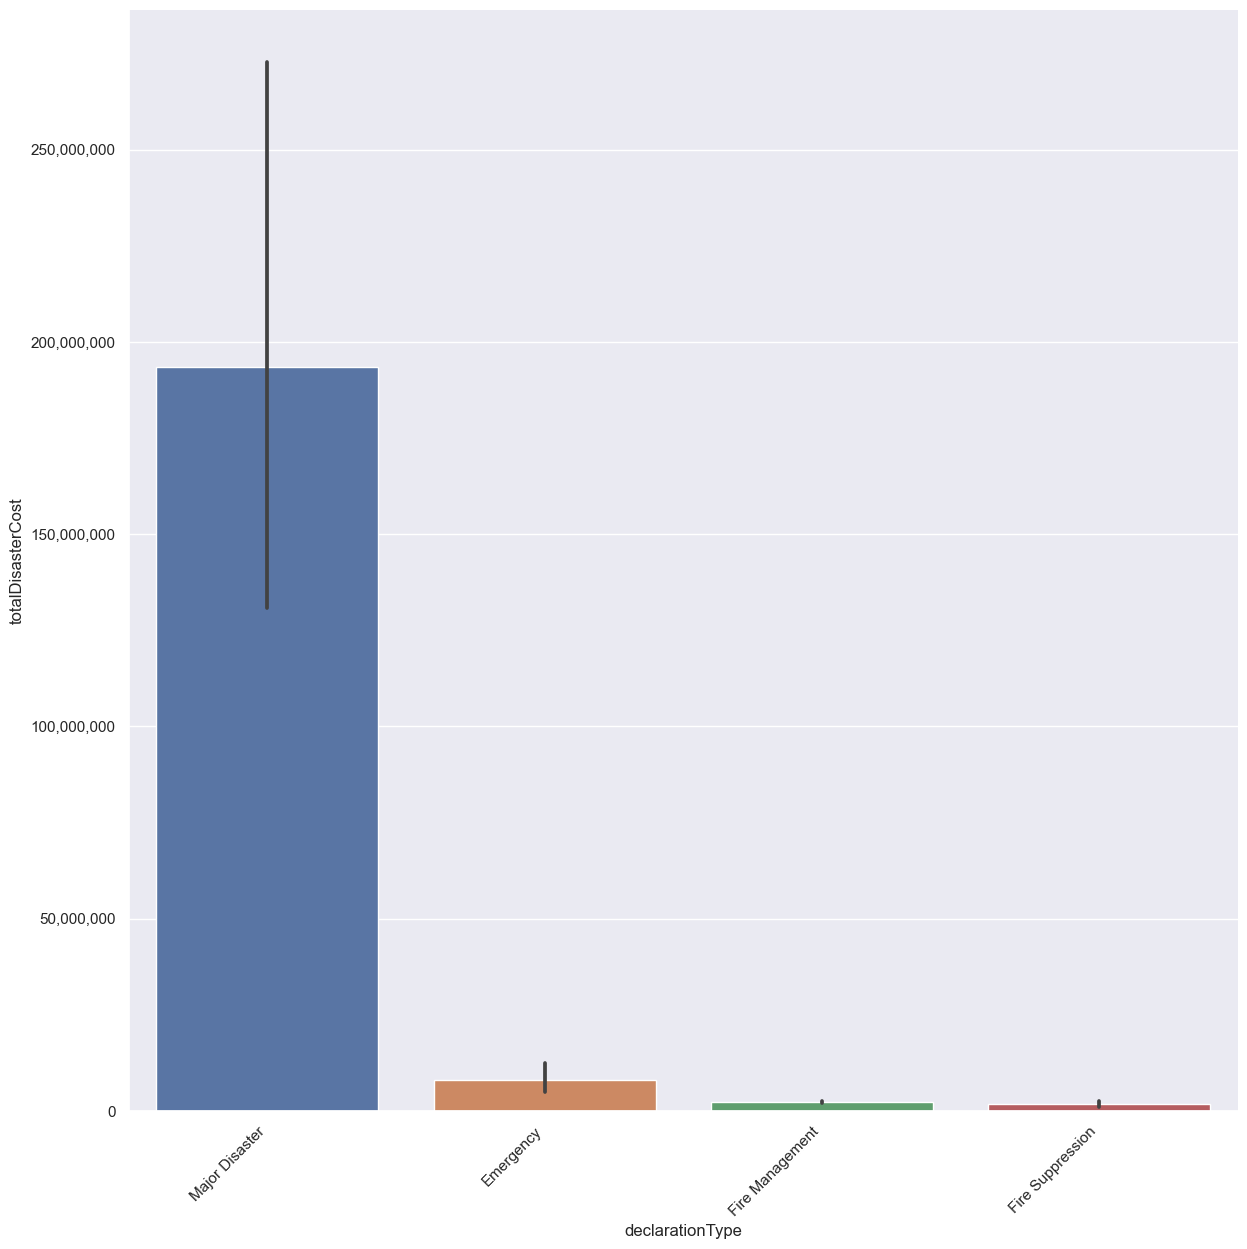

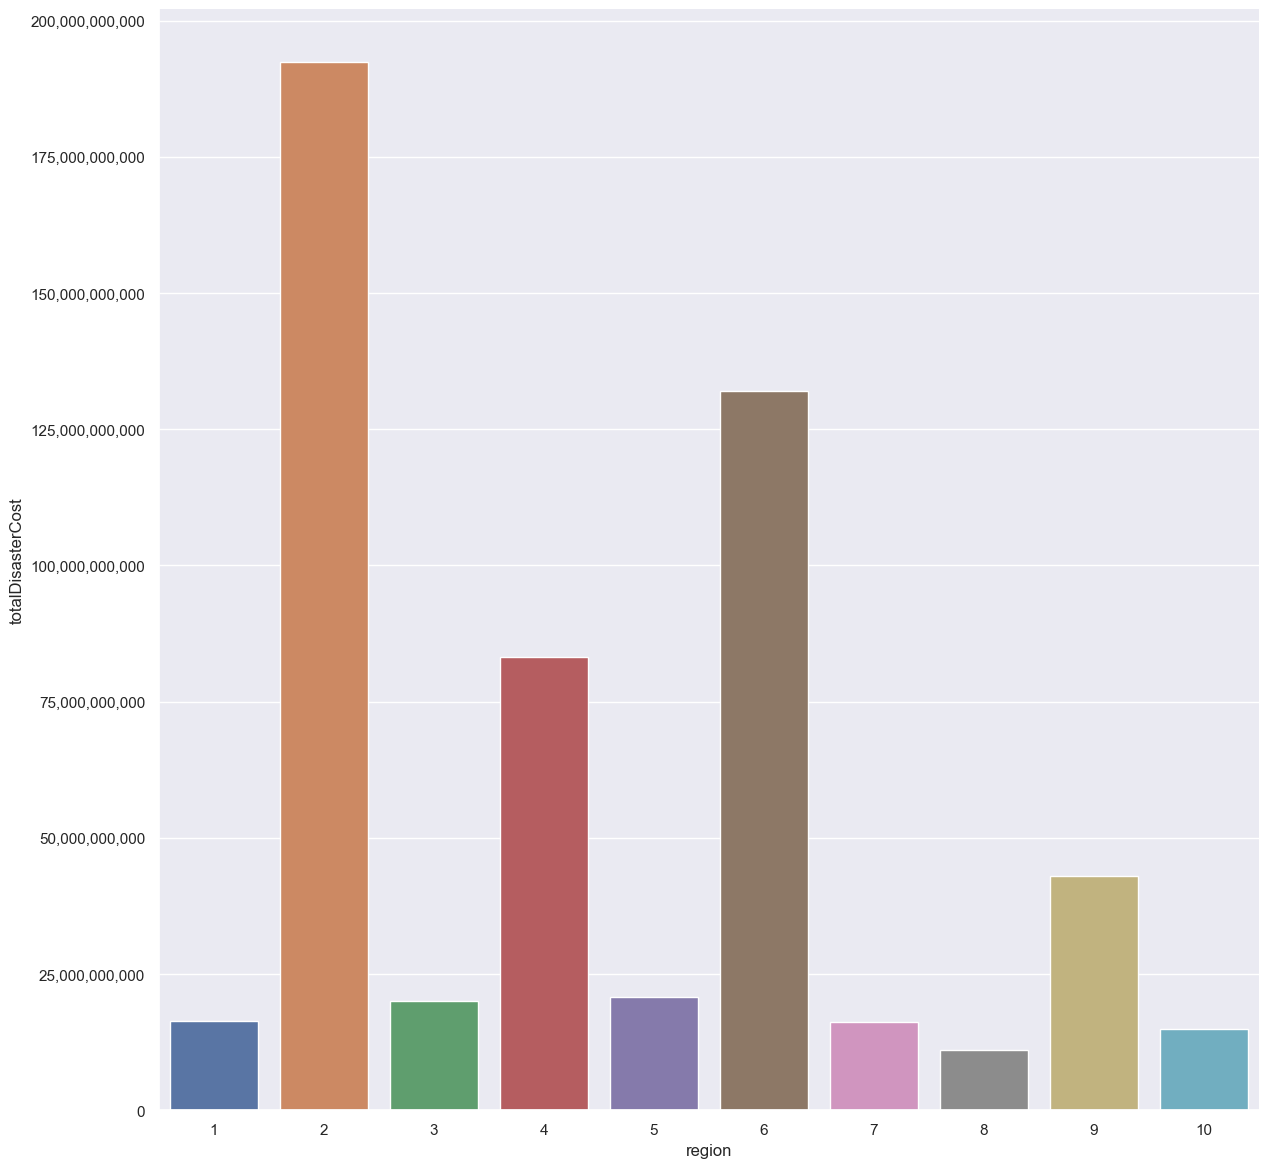

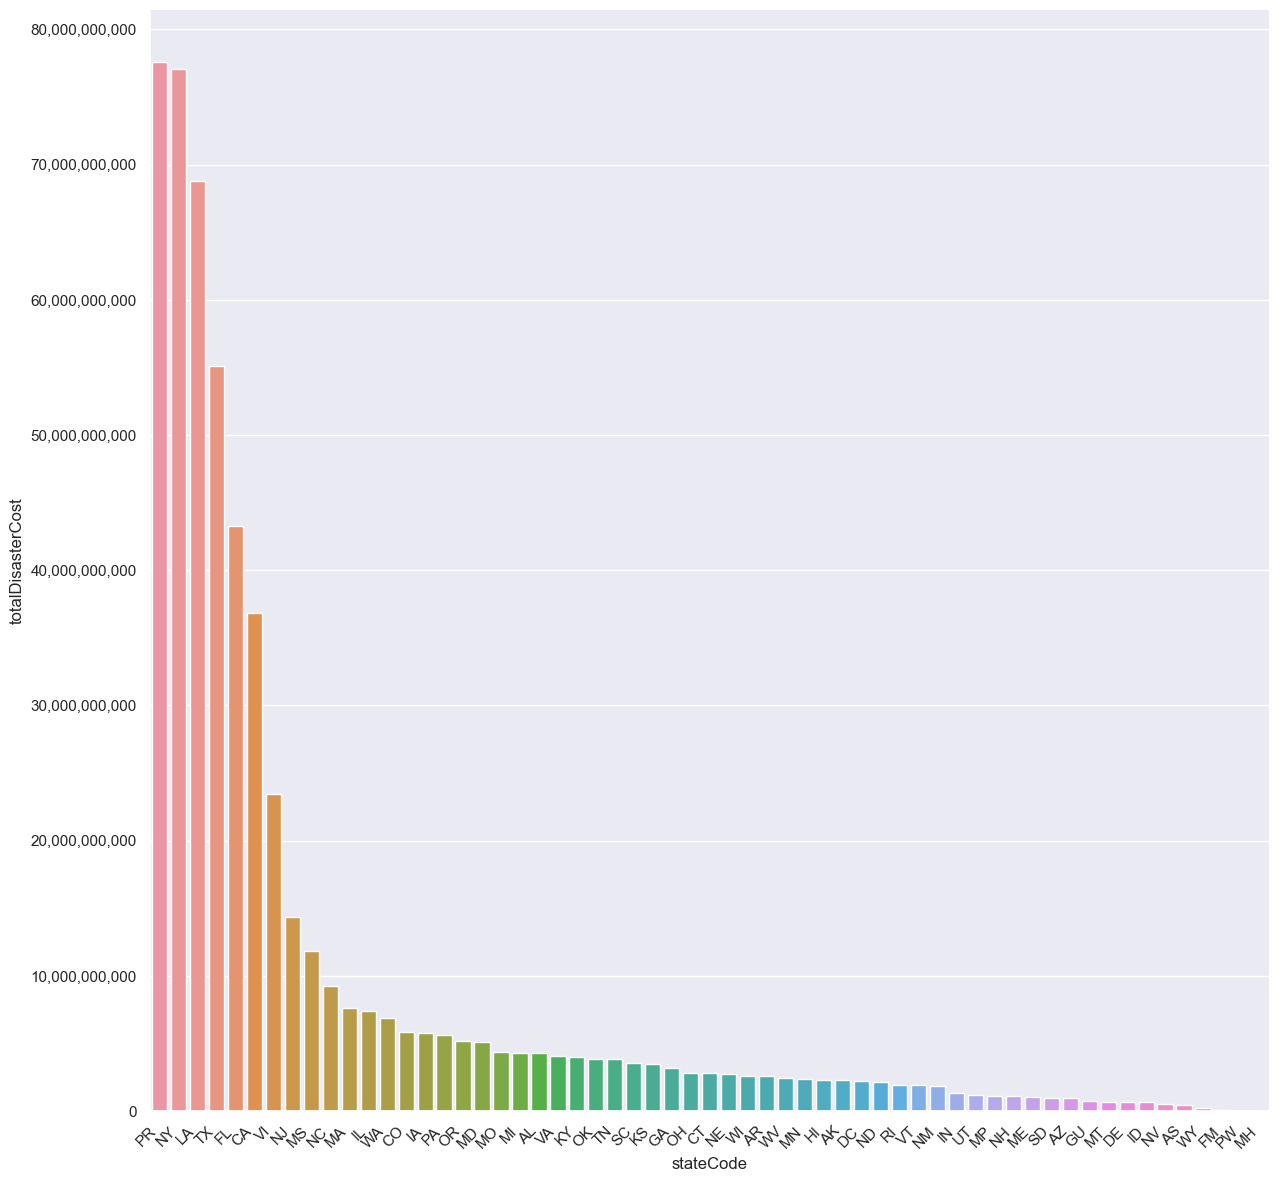

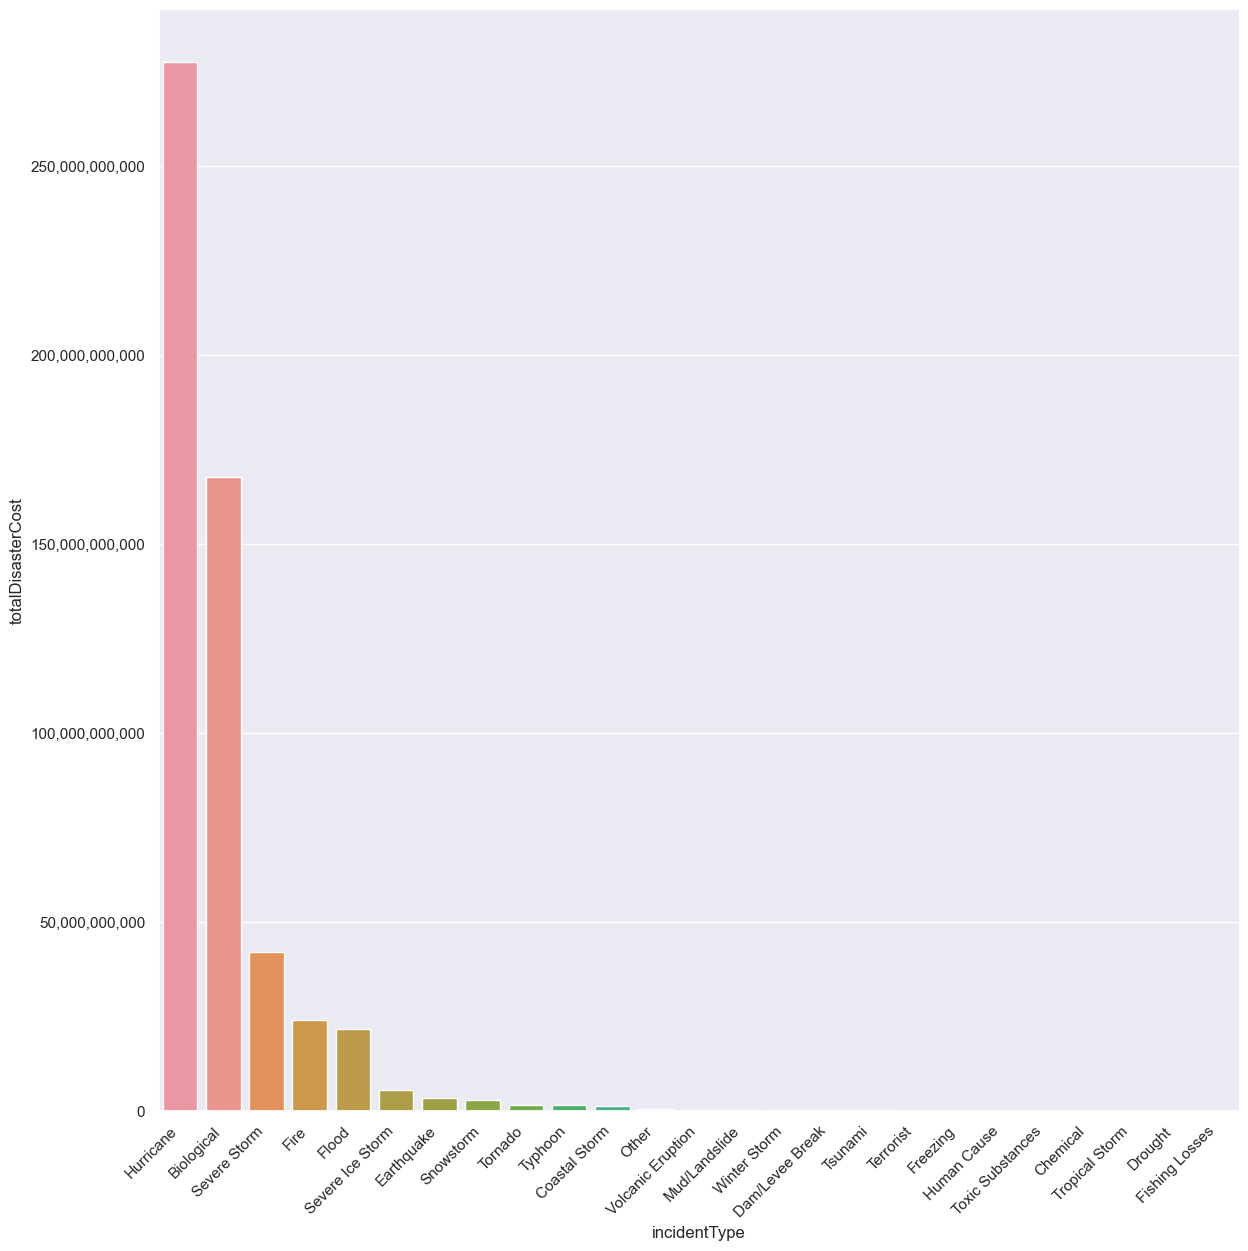

In [27]:
#plot categories vs total cost
pKind='bar' #“strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”
pHeight = 12
#yLogScaled = np.log10(femaDataCleanV2['totalDisasterCost'] + 1)
yLogScaled = 'totalDisasterCost'
#fig, ax = plt.subplots(figsize=(18, 4))
p1 = sns.catplot(data=femaDataCleanV2, x='declarationType', y=yLogScaled, height=pHeight, kind=pKind)
p2 = sns.catplot(data=femaRegionSumDF, x='region', y=yLogScaled, height=pHeight, kind=pKind)
p3 = sns.catplot(data=femaStateSumDF, x='stateCode', y=yLogScaled, height=pHeight, kind=pKind)
p4 = sns.catplot(data=femaIncTypeSumDF, x='incidentType', y=yLogScaled, height=pHeight, kind=pKind)

# Define formatter for number format - x,xxx,xxx,xxx
formatter = ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}') 

ax1 = p1.axes.flat[0]
ax2 = p2.axes.flat[0]
ax3 = p3.axes.flat[0]
ax4 = p4.axes.flat[0]

# Apply the formatter to the y-axis
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_major_formatter(formatter)
ax4.yaxis.set_major_formatter(formatter)

# Rotate X-Axis Labels Diagonally
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
#ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right") # diagonal not needed for region column
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha="right")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha="right")


In [28]:
print('declaration type is not useful. We can discard going forward.')

declaration type is not useful. We can discard going forward.


In [29]:
print('\n*"Biological" was an unexpected standout. Is it possibly due to COVID-19?\n')
femaDataCleanV2[femaDataCleanV2['disasterName'].str.contains('COVID')].head()


*"Biological" was an unexpected standout. Is it possibly due to COVID-19?



,Unnamed: 0,disasterNumber,declarationDate,disasterName,incidentBeginDate,incidentEndDate,declarationType,stateCode,stateName,incidentType,...,totalObligatedAmountPa,totalObligatedAmountCatAb,totalObligatedAmountCatC2g,paLoadDate,iaLoadDate,totalObligatedAmountHmgp,hash_y,lastRefresh_y,id_y,totalDisasterCost
17,17,3485,2020-03-13T00:00:00.000Z,COVID-19,2020-01-20T00:00:00.000Z,2023-05-11T00:00:00.000Z,Emergency,NM,New Mexico,Biological,...,0.00,0.00,0.00,NaN,NaN,0.00,1c7f97e373446fc63622e7b81c76be735d705172,2023-03-18T13:22:12.883Z,513a7894-b438-4c41-975e-40e5f81b8ffd,0.00
30,30,3524,2020-03-13T00:00:00.000Z,COVID-19,2020-01-20T00:00:00.000Z,2023-05-11T00:00:00.000Z,Emergency,IA,Iowa,Biological,...,0.00,0.00,0.00,NaN,NaN,0.00,3e6c9d1b7528c872ace75b3b0e3287582686a73d,2023-03-18T13:22:12.883Z,e306adc3-0690-4095-b5d3-4c030961ebcb,0.00
59,59,3493,2020-03-13T00:00:00.000Z,COVID-19,2020-01-20T00:00:00.000Z,2023-05-11T00:00:00.000Z,Emergency,NE,Nebraska,Biological,...,0.00,0.00,0.00,NaN,NaN,0.00,0260b009c6ec4affd53cedd09fdf4576295a3221,2023-03-18T13:22:12.883Z,013e1c83-0935-412b-a7e8-d74ffa782b46,0.00
62,62,3510,2020-03-13T00:00:00.000Z,COVID-19,2020-01-20T00:00:00.000Z,2023-05-11T00:00:00.000Z,Emergency,NM,New Mexico,Biological,...,0.00,0.00,0.00,NaN,NaN,0.00,53c0e7c31baa049e8f4a7791593e92e0625ba51a,2023-03-18T13:22:12.883Z,493817e8-49d2-443d-b5b4-59613e5529f2,0.00
91,91,3522,2020-03-13T00:00:00.000Z,COVID-19,2020-01-20T00:00:00.000Z,2023-05-11T00:00:00.000Z,Emergency,LA,Louisiana,Biological,...,0.00,0.00,0.00,NaN,NaN,0.00,d9cac13f100d12f01d644be149ca74f17ff686b7,2023-03-18T13:22:12.883Z,754b4bd9-db58-40e5-bd48-6e5cc78a9bf1,0.00


In [30]:
femaDataCleanV2[femaDataCleanV2['disasterName'].str.contains('COVID')].describe()

,Unnamed: 0,disasterNumber,region,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,totalNumberIaApproved,totalAmountIhpApproved,totalAmountHaApproved,totalAmountOnaApproved,totalObligatedAmountPa,totalObligatedAmountCatAb,totalObligatedAmountCatC2g,totalObligatedAmountHmgp,totalDisasterCost
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,705.87,3846.26,5.53,0.35,0.00,1.00,0.35,2971.05,19145402.46,0.00,19145402.46,488483631.52,472502118.04,0.00,5265845.51,1004542400.00
std,213.59,493.93,2.56,0.48,0.00,0.00,0.48,7236.63,46855825.27,0.00,46855825.27,1888015971.14,1814620622.92,0.00,18225289.68,3793879049.61
min,17.00,3427.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,734.00,3468.50,4.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,777.00,3510.00,6.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,818.50,4496.50,7.00,1.00,0.00,1.00,1.00,1457.50,10042169.57,0.00,10042169.57,194597651.20,187024263.26,0.00,2253864.12,438144399.61
max,860.00,4591.00,10.00,1.00,0.00,1.00,1.00,42693.00,275612279.22,0.00,275612279.22,15105205137.35,14531826835.32,0.00,177150366.09,30058515058.44


#### Feature Selection and Engineering
- target variable: totalDisasterCost 
    - *(a value computed via summing all cost fields per given disaster incident row)*
- key categorical variables: incidentType, region, stateCode
- key numeric variables: totalNumberIaApproved, totalAmountIhpApproved, totalAmountHaApproved, totalAmountOnaApproved 
    - (a boolean indicator of whether or not the specified type of program aid was approved for funding)
- analysis 
    - which incident type disasters are most frequent?
    - which incident type disasters are most expensize per disaster?
    - which state or region has most expensive disasters per incident?



In [32]:
#TO DO

'''
-subject matter review..
-limit the data based on date it was added so that each pull does not continually add more data'''

'\n-subject matter review..\n-limit the data based on date it was added so that each pull does not continually add more data'